In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.


In [87]:
def parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def encode(Y):
    encode_y = np.zeros((Y.size, Y.max() + 1))
    encode_y[np.arange(Y.size), Y] = 1
    encode_y = encode_y.T
    return encode_y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    encode_Y = encode(Y)
    dZ2 = A2 - encode_Y
    derv_W2 = 1 / m * dZ2.dot(A1.T)
    derv_b2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    derv_W1 = 1 / m * dZ1.dot(X.T)
    derv_b1 = 1 / m * np.sum(dZ1)
    return derv_W1, derv_b1, derv_W2, derv_b2

def update(W1, b1, W2, b2, derv_W1, derv_b1, derv_W2, derv_b2, alpha):
    W1 = W1 - alpha * derv_W1
    b1 = b1 - alpha * derv_b1    
    W2 = W2 - alpha * derv_W2  
    b2 = b2 - alpha * derv_b2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = parameters()
    x=list()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        derv_W1, derv_b1, derv_W2, derv_b2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, derv_W1, derv_b1, derv_W2, derv_b2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            x.append([i , get_accuracy (predictions, Y)])
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2 ,x


In [90]:
W1, b1, W2, b2 ,accuracy  = gradient_descent(X_train, Y_train, 0.1, 10000)


Iteration:  0
[1 9 9 ... 6 3 9] [6 3 9 ... 4 3 4]
[1 9 9 ... 6 3 9] [6 3 9 ... 4 3 4]
0.14214634146341462
Iteration:  100
[6 3 8 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 8 ... 4 3 4] [6 3 9 ... 4 3 4]
0.6233170731707317
Iteration:  200
[6 3 4 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 4 ... 4 3 4] [6 3 9 ... 4 3 4]
0.7488536585365854
Iteration:  300
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
0.8028048780487805
Iteration:  400
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
0.8325853658536585
Iteration:  500
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
0.8488780487804878
Iteration:  600
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
0.8589268292682927
Iteration:  700
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
0.8672195121951219
Iteration:  800
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
[6 3 9 ... 4 3 4] [6 3 9 ... 4 3 4]
0.873219512195122
Iteration:  900
[6 3 9 ... 4 3 4] [6 3 

In [94]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


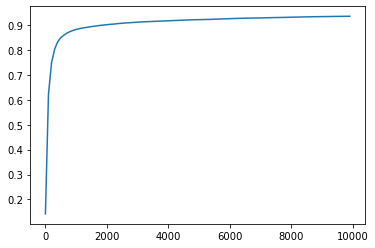

In [95]:
accuracy = np.array(accuracy)
plt.plot(accuracy[:,0],accuracy[:,1])


Prediction:  [6]
Label:  6


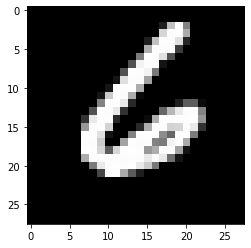

Prediction:  [3]
Label:  3


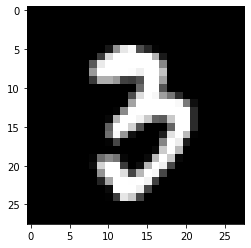

Prediction:  [9]
Label:  9


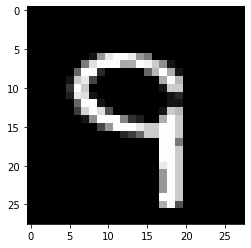

Prediction:  [3]
Label:  2


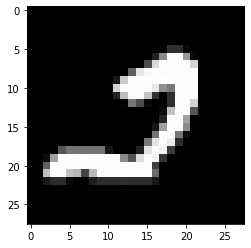

Prediction:  [5]
Label:  5


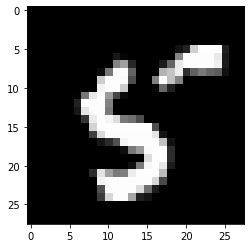

Prediction:  [2]
Label:  2


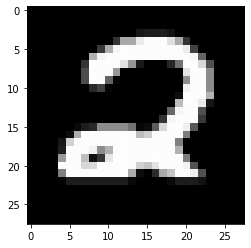

Prediction:  [2]
Label:  2


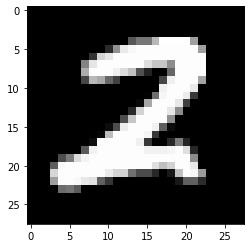

Prediction:  [2]
Label:  2


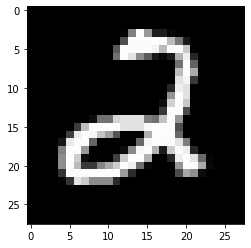

Prediction:  [0]
Label:  0


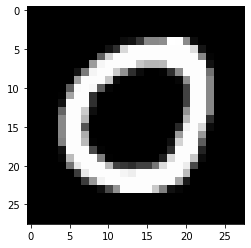

Prediction:  [7]
Label:  7


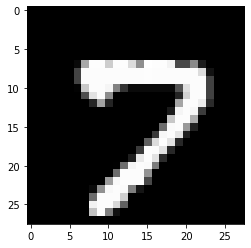

In [96]:
for i in range (10) :
    test_prediction(i, W1, b1, W2, b2)
